<a href="https://colab.research.google.com/github/DineshKumar1239/geneai/blob/main/OBJECT_DETECTION_BY_CUSTOM_DATASET_USING_YOLOV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/~..

/content/drive/MyDrive/~..


In [ ]:
!ls

data.yaml  runs  test  train  valid  yolov8s.pt


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

In [ ]:


!ls runs/detect/train/

args.yaml  weights


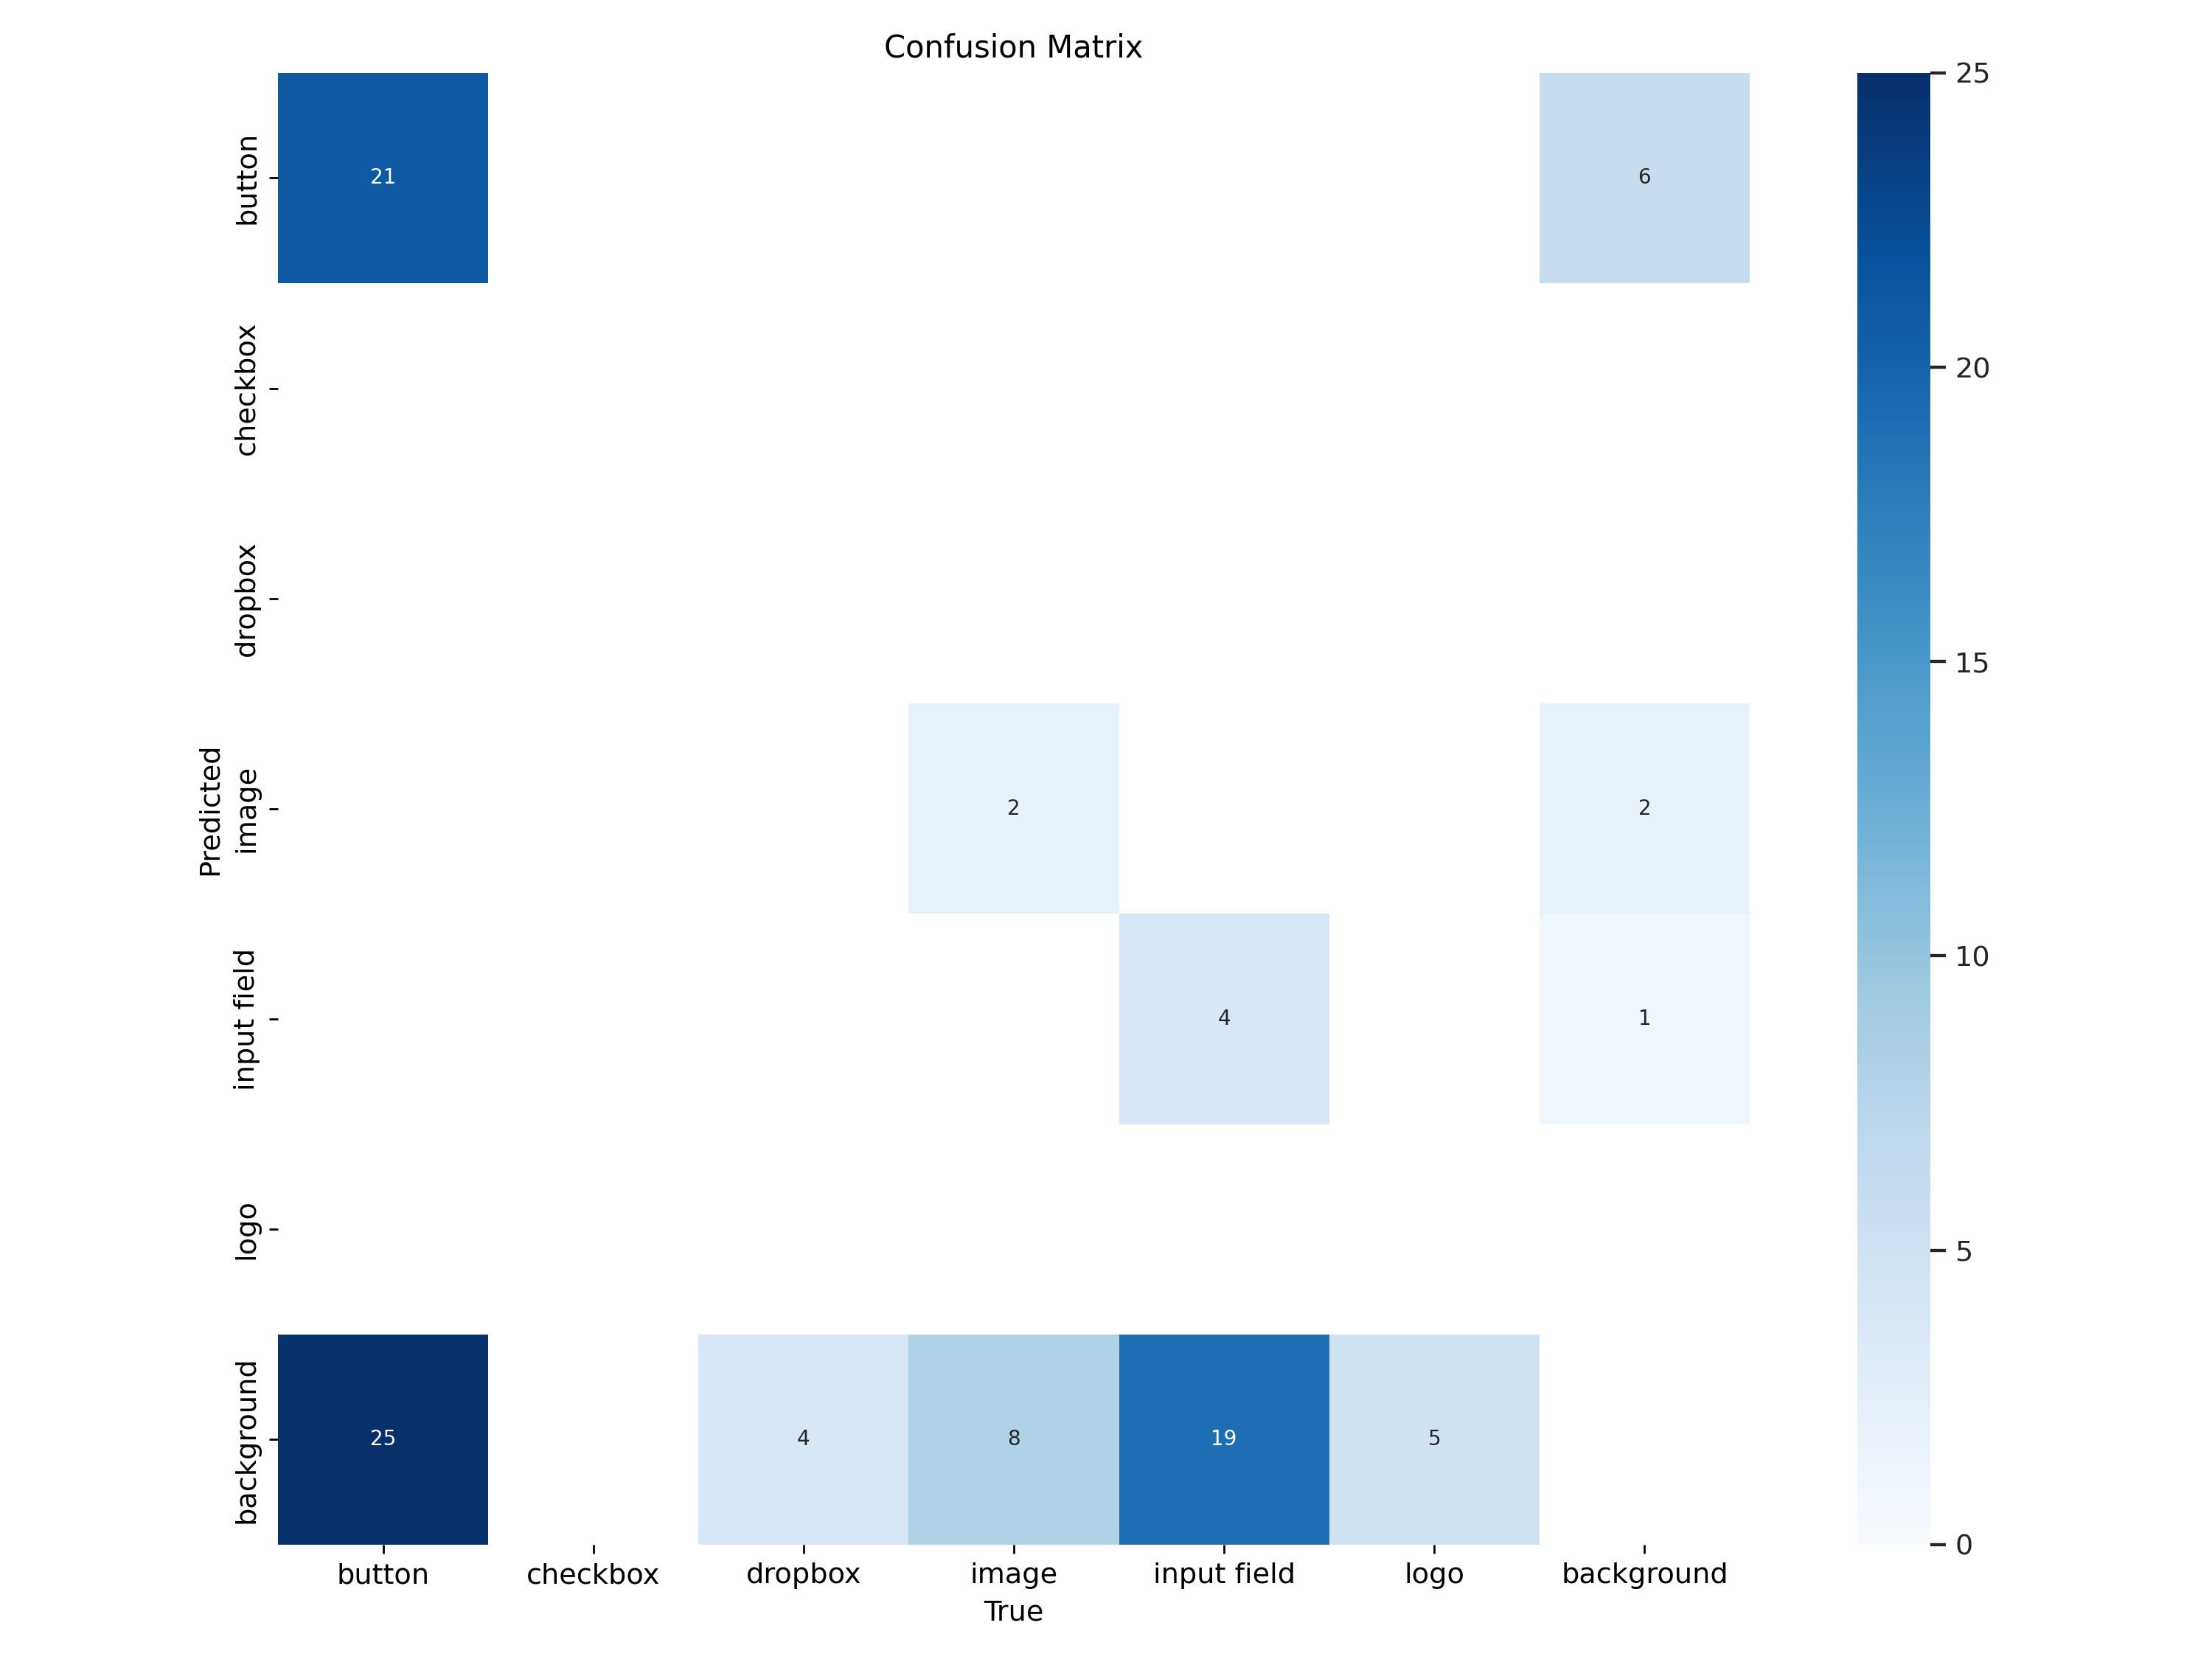

In [ ]:
Image(filename='runs/detect/train3/confusion_matrix.png', width=600)

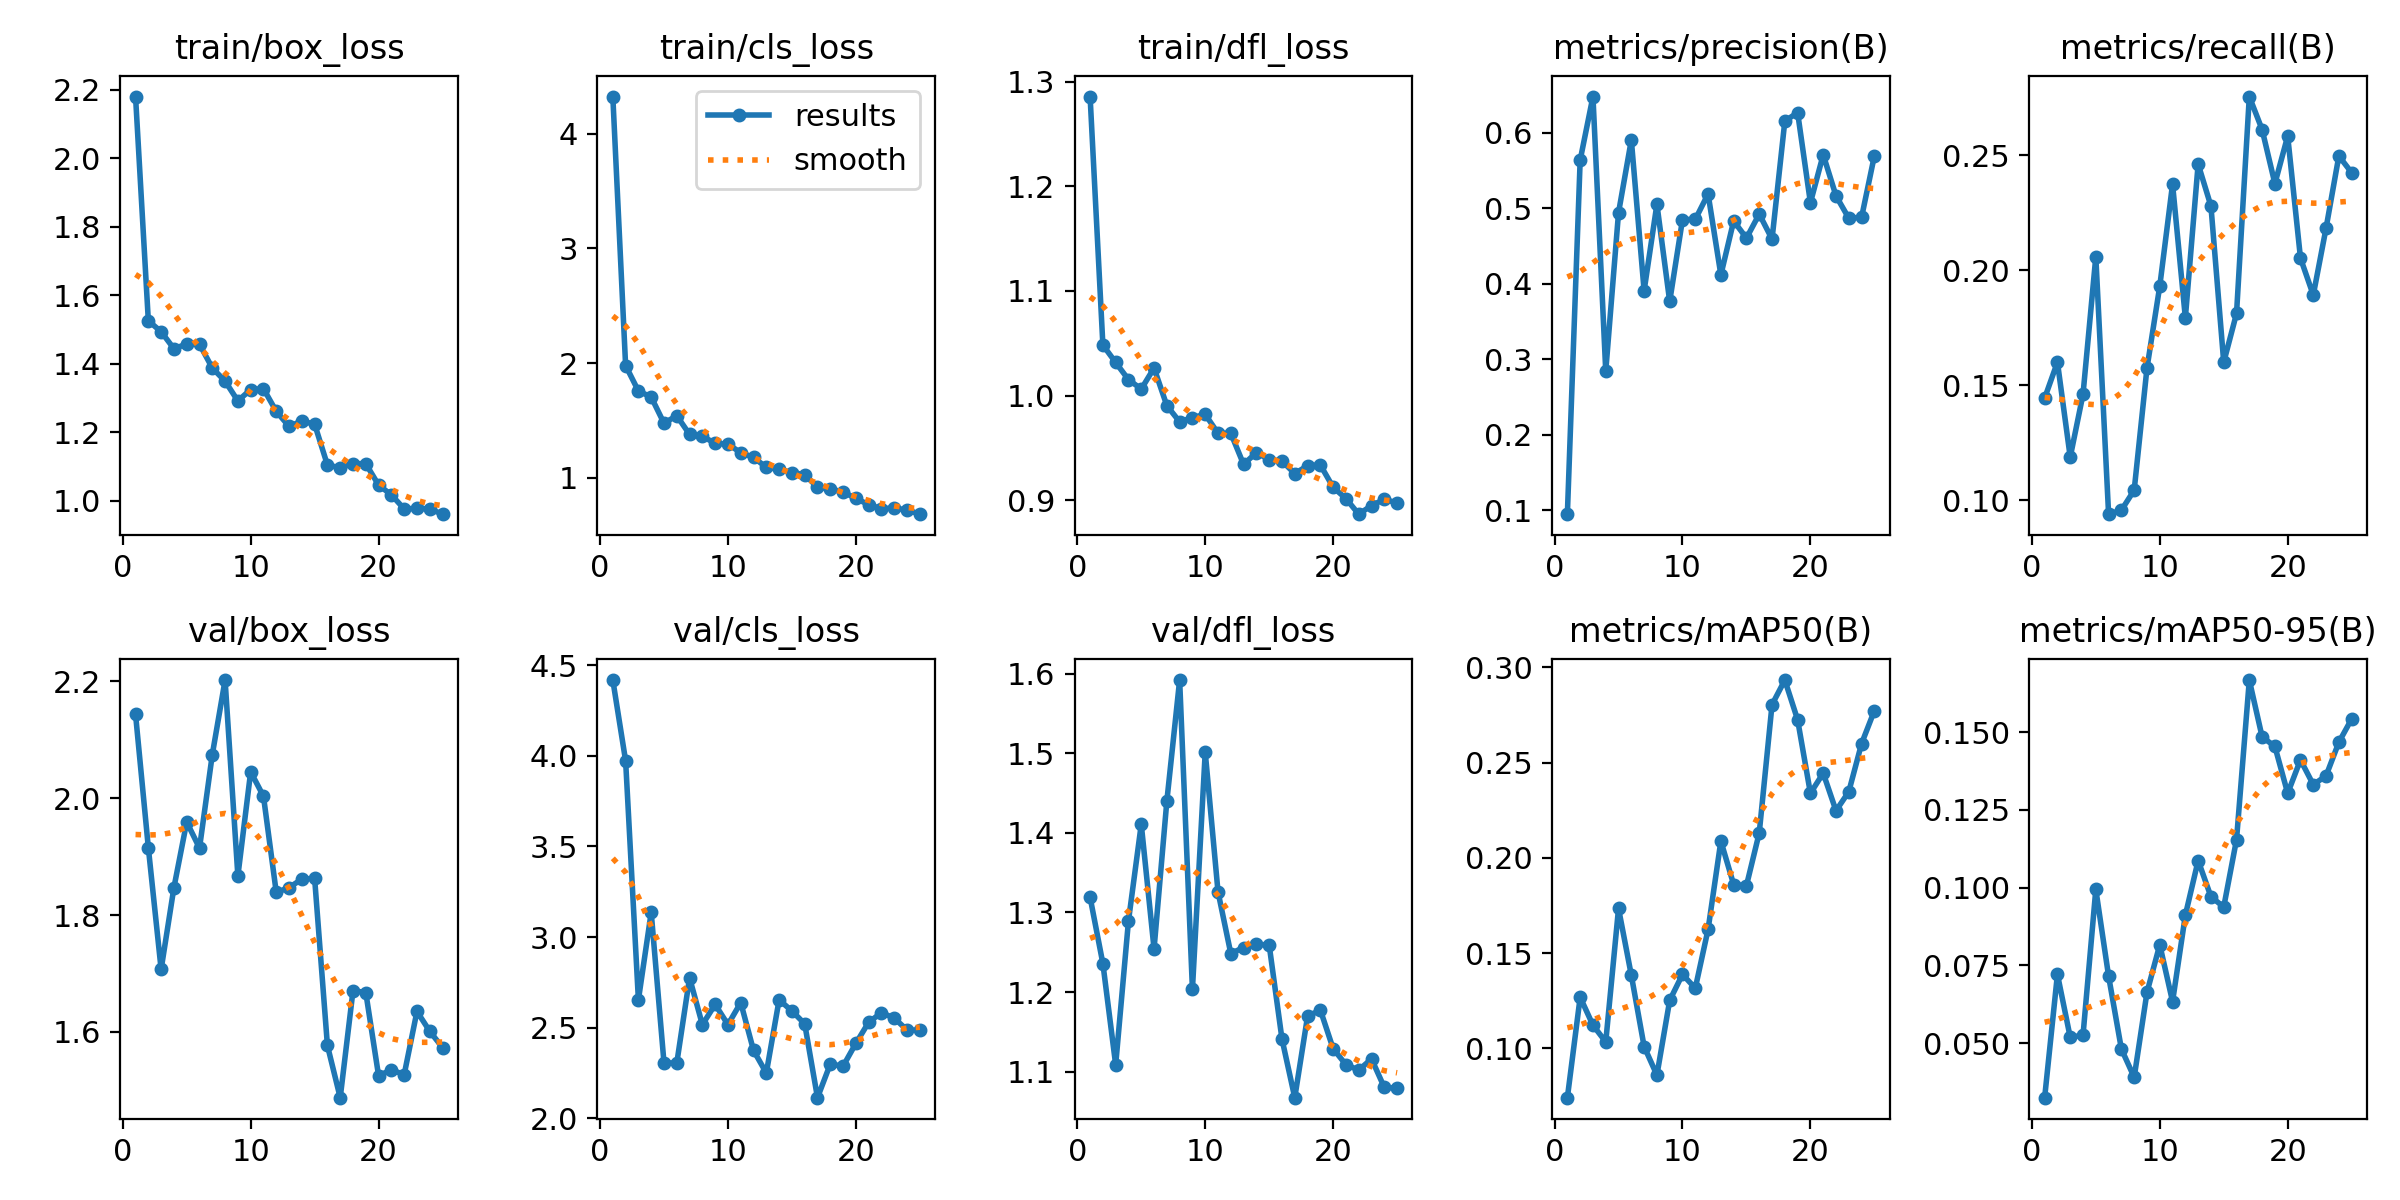

In [ ]:
Image(filename='runs/detect/train3/results.png', width=600)

In [ ]:
!ls runs/detect/train/

args.yaml  weights


In [ ]:
!ls runs/detect/train2/

args.yaml					    labels.jpg	      train_batch1.jpg
events.out.tfevents.1706974060.4c9973a78eb2.9997.0  results.csv       train_batch2.jpg
labels_correlogram.jpg				    train_batch0.jpg  weights


In [ ]:
!ls runs/detect/train3/

args.yaml					   P_curve.png	     train_batch2.jpg
confusion_matrix_normalized.png			   PR_curve.png      train_batch330.jpg
confusion_matrix.png				   R_curve.png	     train_batch331.jpg
events.out.tfevents.1706974402.856c24a35166.923.0  results.csv	     train_batch332.jpg
F1_curve.png					   results.png	     val_batch0_labels.jpg
labels_correlogram.jpg				   train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					   train_batch1.jpg  weights


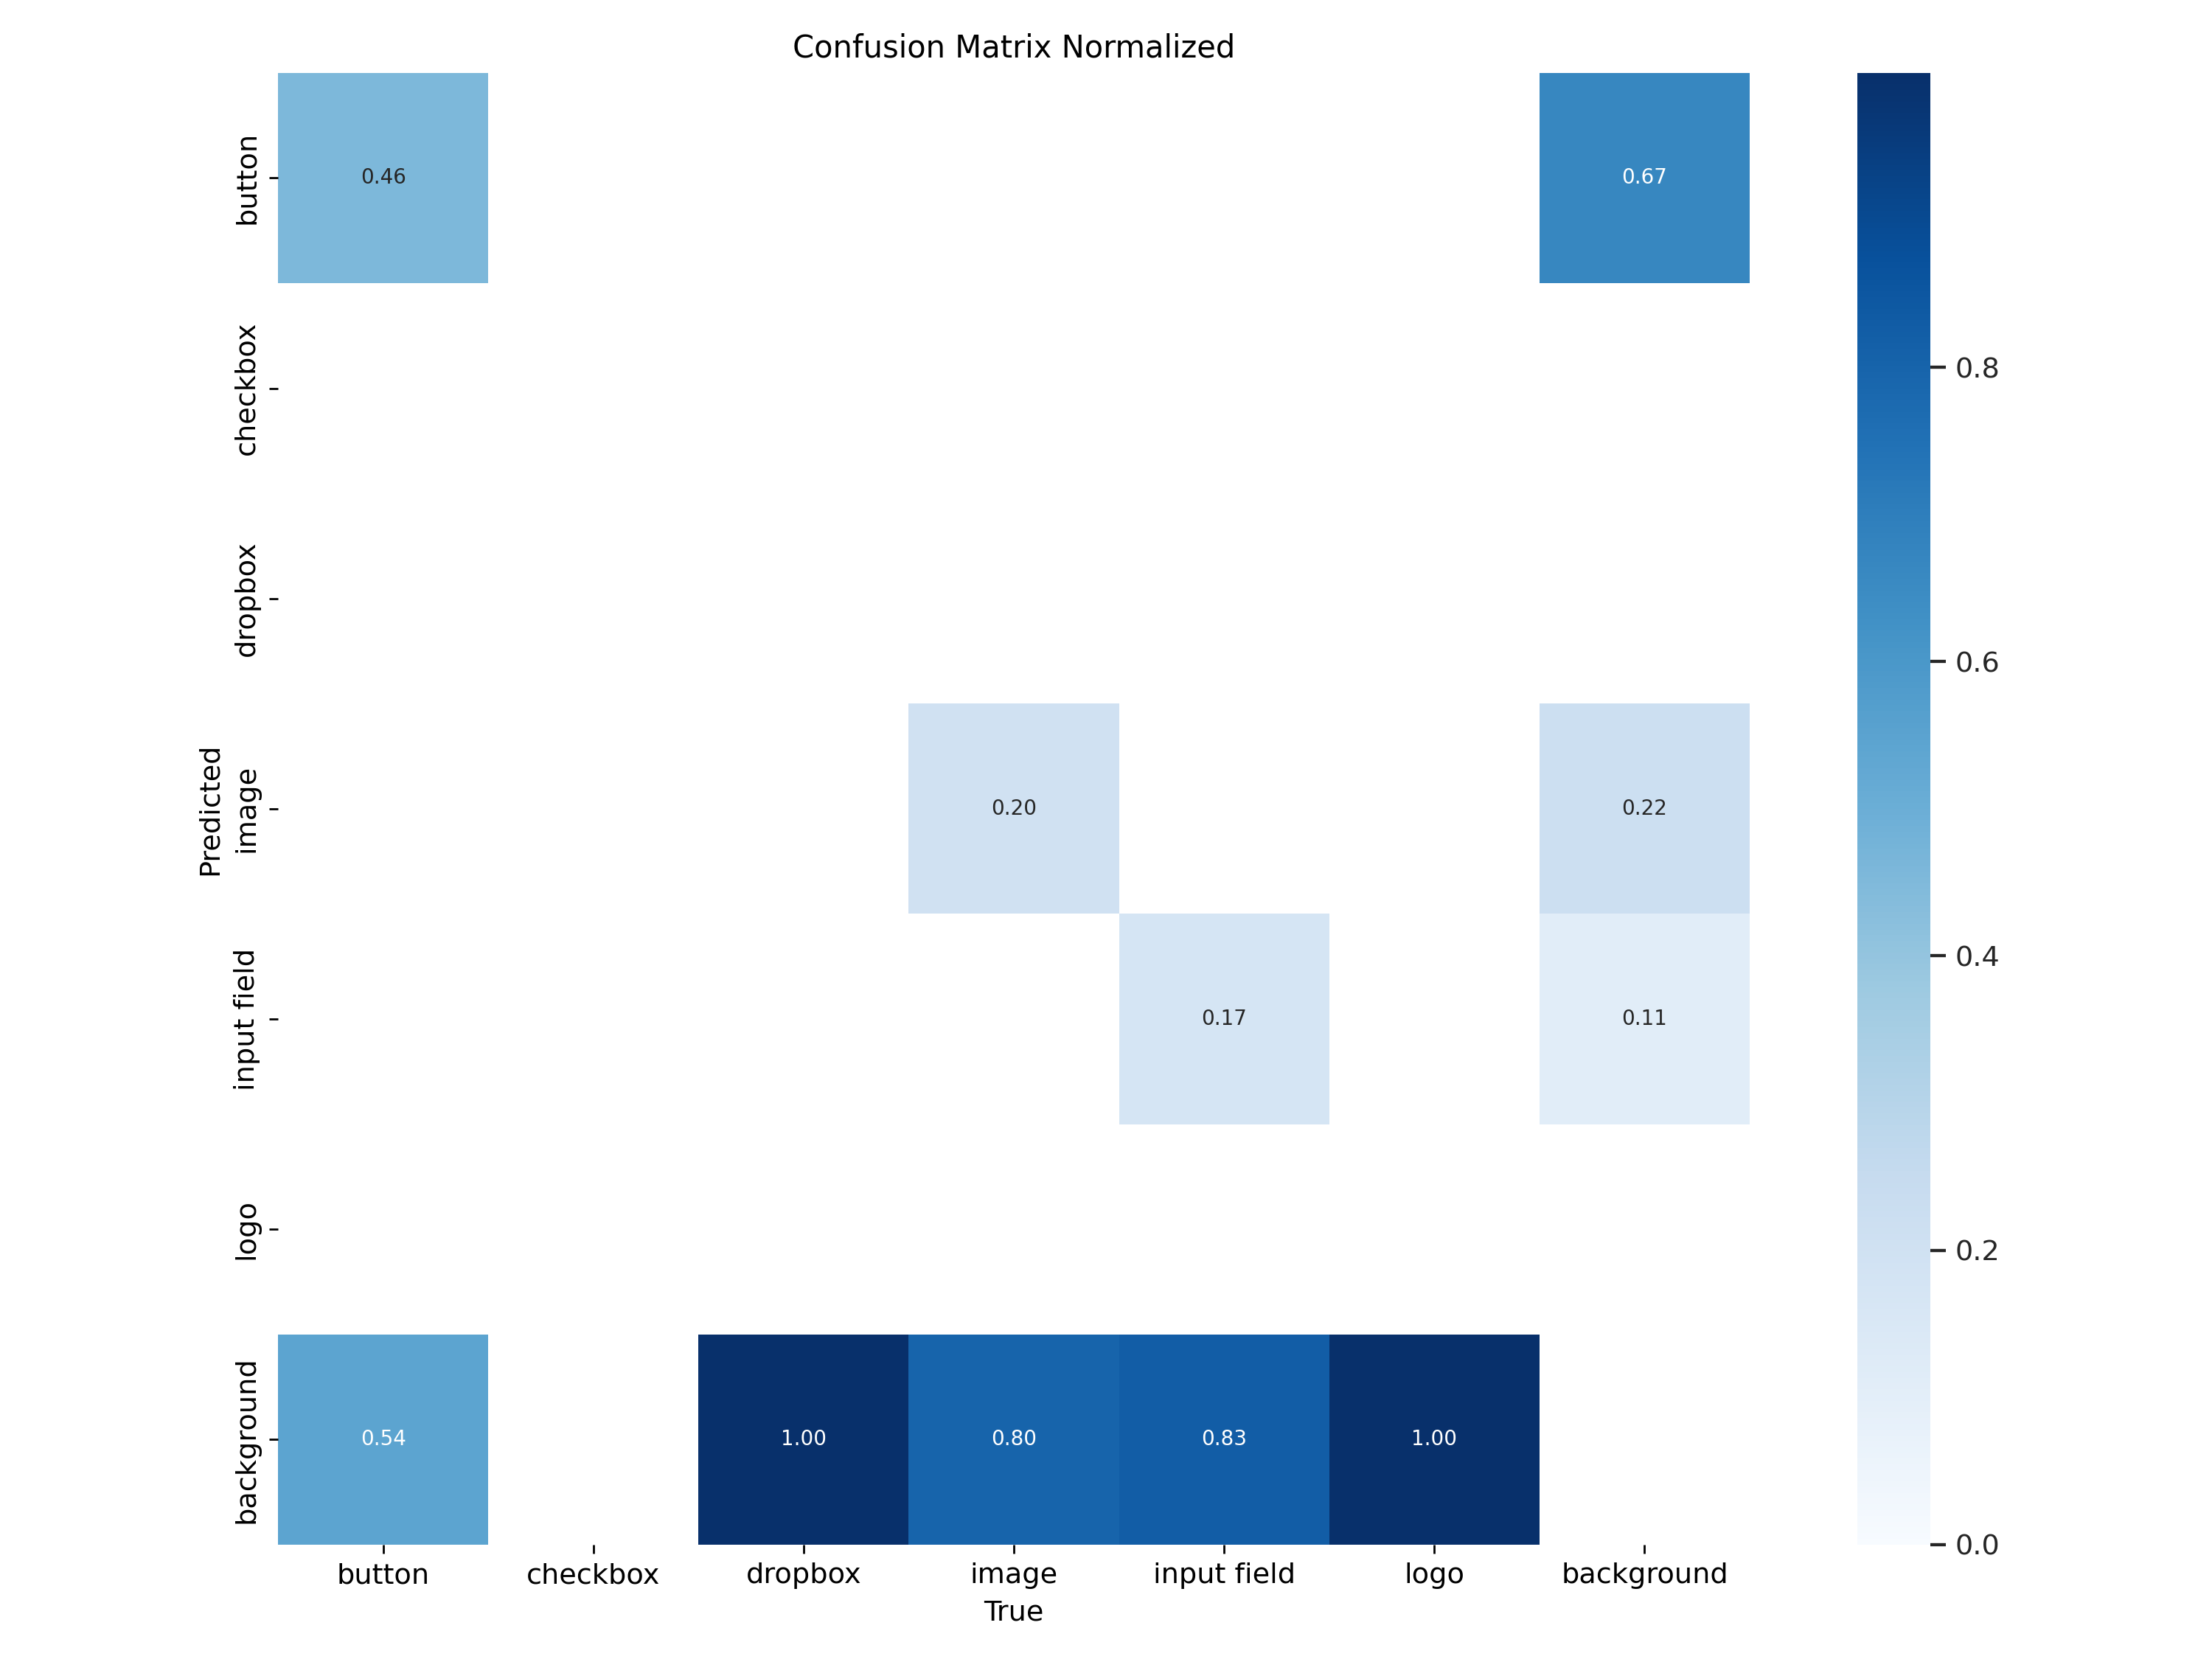

In [ ]:
Image(filename='runs/detect/train3/confusion_matrix_normalized.png', width=600)

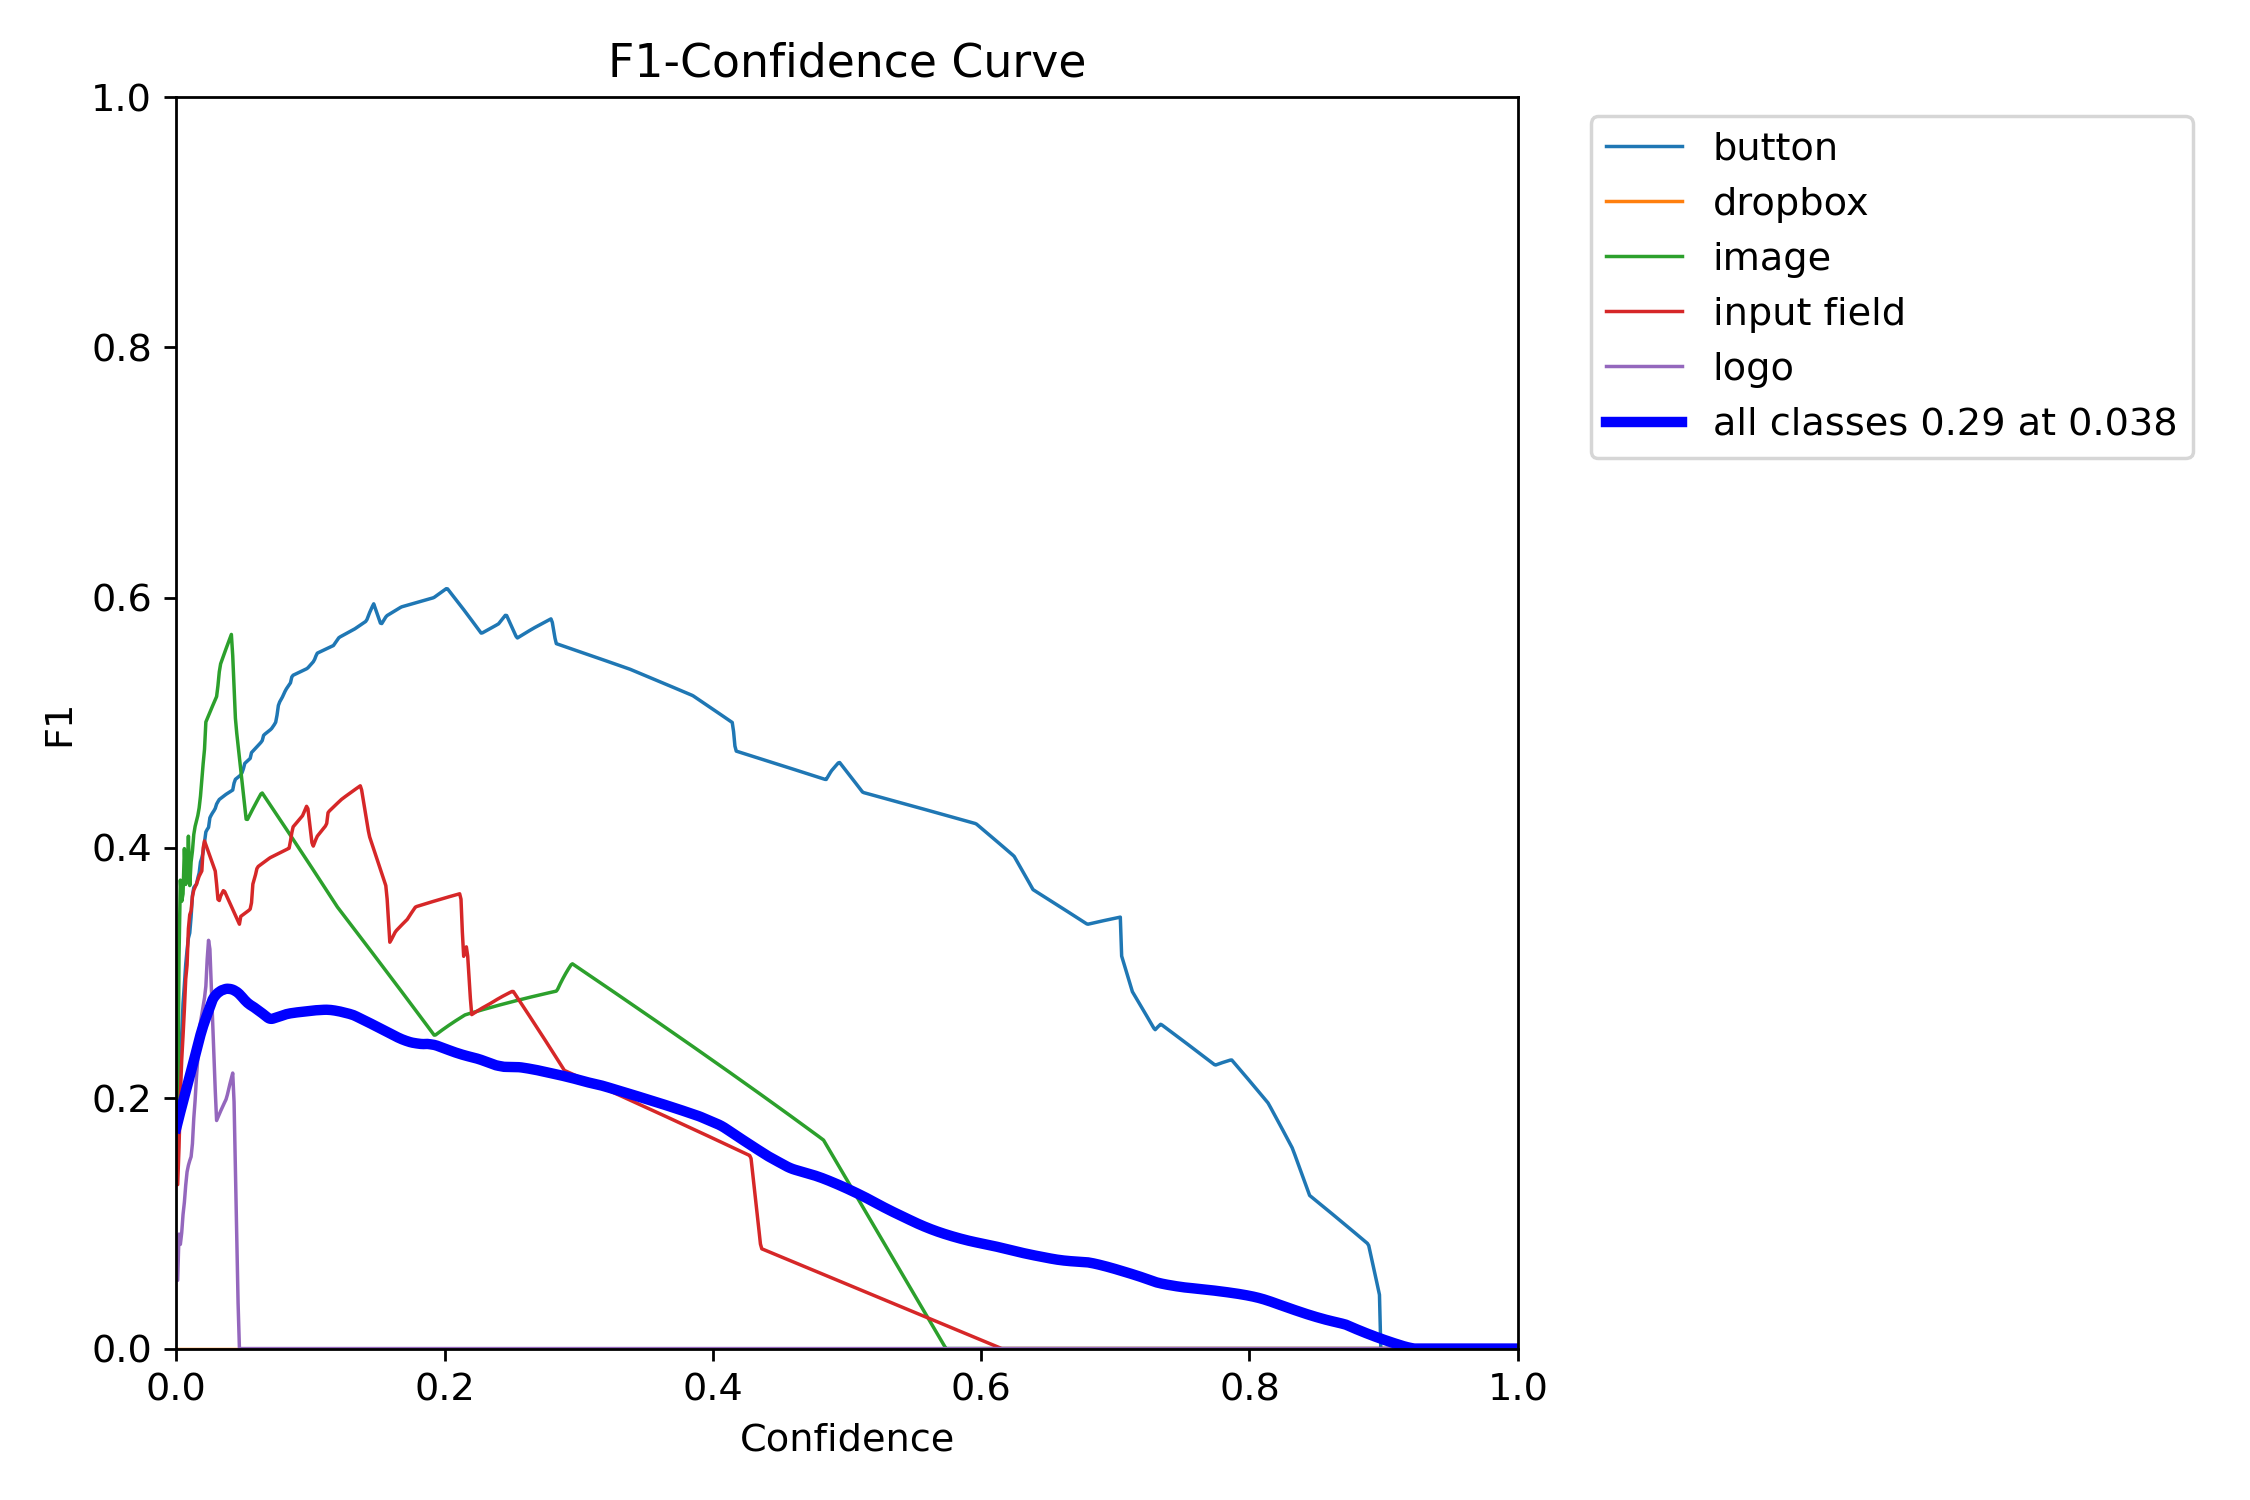

In [ ]:
Image(filename='runs/detect/train3/F1_curve.png', width=600)

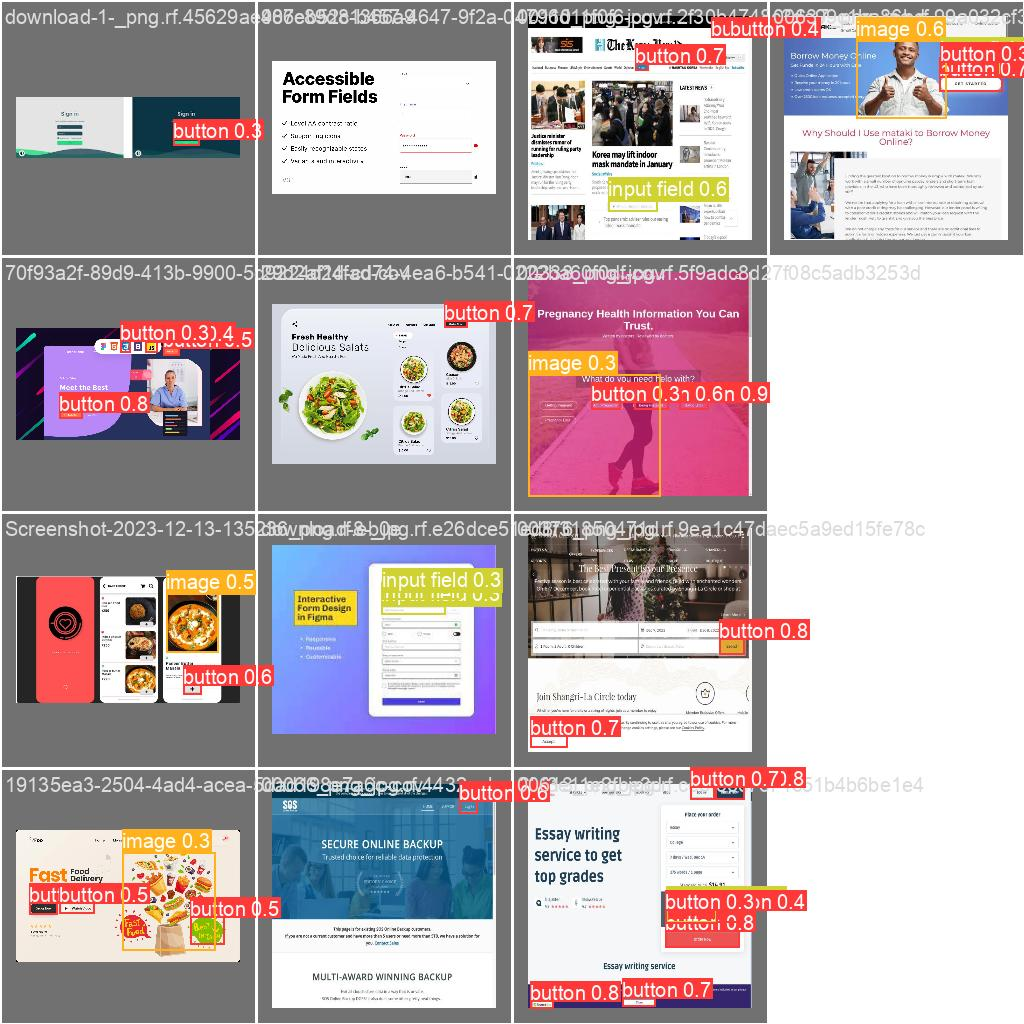

In [ ]:
Image(filename='runs/detect/train3/val_batch0_pred.jpg', width=600)

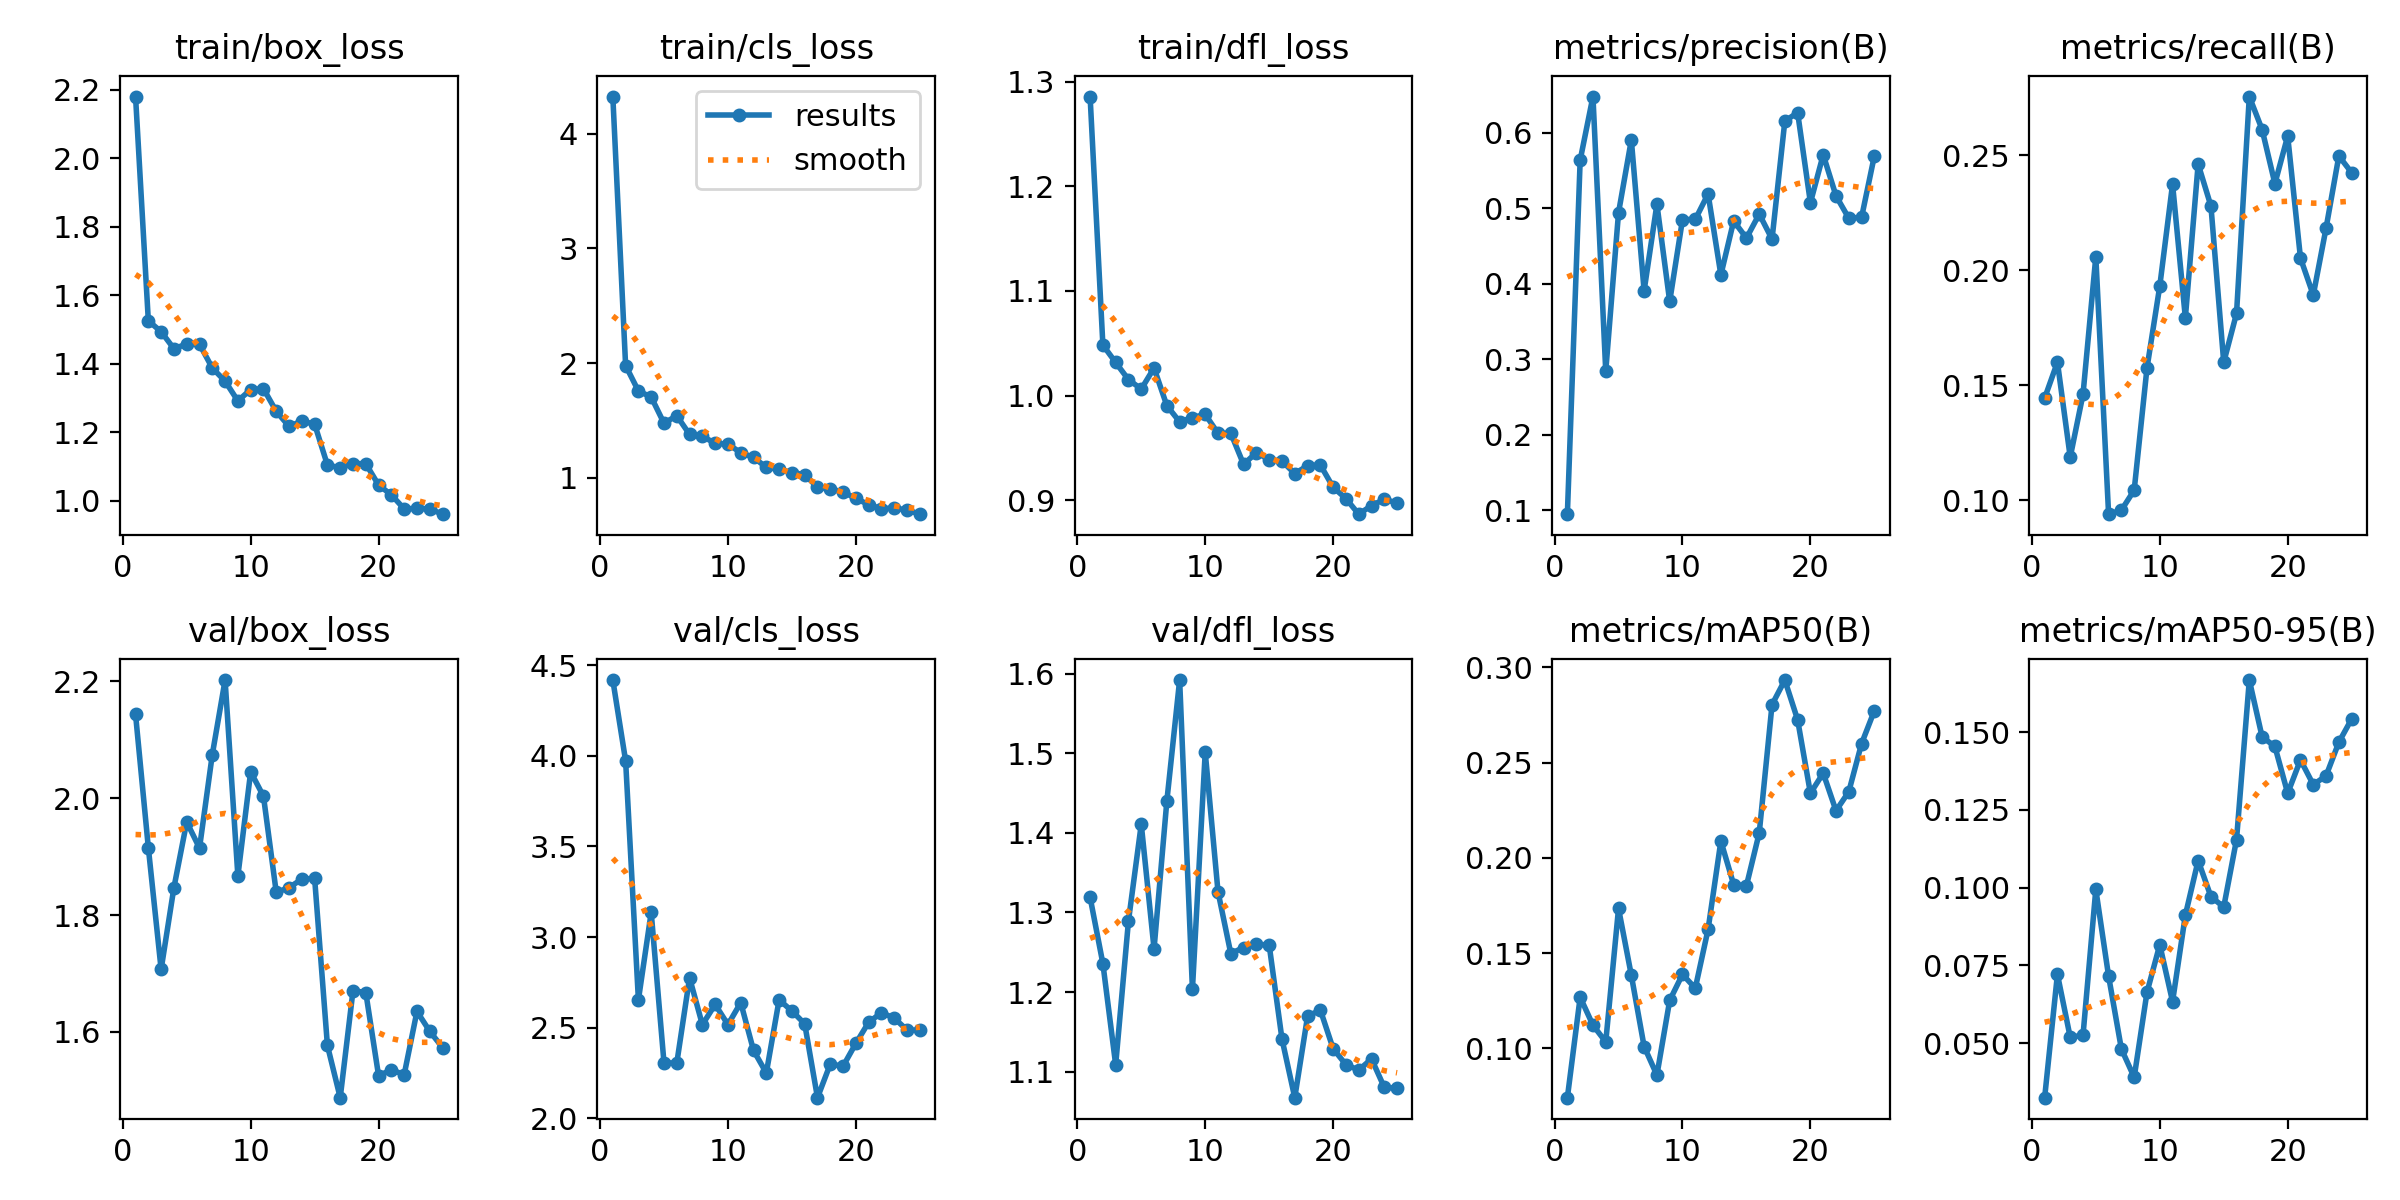

In [ ]:
Image(filename='runs/detect/train3/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=runs/detect/train3/weights/best.pt data=data.yaml

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/~../valid/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100% 13/13 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.23s/it]
                   all         13         88      0.457      0.275       0.28      0.168
                button         13         46      0.439      0.543      0.495      0.308
               dropbox         13          4          1          0          0          0
                 image         13         10      0.499      0.398      0.433      0.283
           input field         13         23       0.35      0.435      0.343      0.176
                  logo         13          5          0          0       0.13     0.0723
Speed: 0.1ms preprocess, 16.2ms inference, 0.0m

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source=/content/drive/MyDrive/~../test/images

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/6 /content/drive/MyDrive/~../test/images/00148_png_jpg.rf.f0fae4e09b4d16d9a8b53cbe66526e4f.jpg: 224x224 3 buttons, 10.7ms
image 2/6 /content/drive/MyDrive/~../test/images/00566_png_jpg.rf.bd60a3069d7eaea51f145b376972a6b7.jpg: 224x224 2 buttons, 7.3ms
image 3/6 /content/drive/MyDrive/~../test/images/1706976903434.png: 224x128 2 buttons, 6 input fields, 1 logo, 71.0ms
image 4/6 /content/drive/MyDrive/~../test/images/1706976903446.png: 224x128 4 buttons, 1 input field, 7.4ms
image 5/6 /content/drive/MyDrive/~../test/images/1706976903458.png: 224x128 1 button, 5 input fields, 1 logo, 7.6ms
image 6/6 /content/drive/MyDrive/~../test/images/1706976903471.png: 224x128 1 button, 1 logo, 7.9ms
Speed: 0.8ms preprocess, 18.7ms inference, 110.2ms postprocess per image at shape (1, 3, 224, 128)
Results saved to runs/detect/pre

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")